In [14]:
# pip install deepface==0.0.4


In [15]:
from deepface import DeepFace
import pandas as pd
import numpy as np
import requests
import cv2
import matplotlib.pyplot as plt
import urllib.request

In [16]:
FileName = "images_file.csv"
FilePath = 'Images/'

df = pd.read_csv('project_data.csv')


In [ ]:
df.User_Gender.describe()

In [ ]:
df.User_Gender.isnull().sum()

In [17]:
# url_img = 'https://s3-us-west-1.amazonaws.com/coderbyteprofiles/AjeethKannan.jpg'
# response = requests.get(url_img)
image_name = FilePath + 'ImageNum20.jpg'
final_gender = None

# with open(image_name, 'wb') as file:
#         file.write(response.content)

img = cv2.imread(image_name)

gender = cv2.dnn.readNetFromCaffe("gender.prototxt","gender.caffemodel")
detector_path = "haarcascade_frontalface_alt.xml"
detector = cv2.CascadeClassifier(detector_path)
faces = detector.detectMultiScale(img,1.3,5)
if(len(faces)>0):

    x, y ,w, h = faces[0]
    detected_face = img[int(y):int(y+h), int(x):int(x+w)]
    plt.imshow(detected_face[:,:,::-1])
    detected_face = cv2.resize(detected_face,(224,224))




    if(detected_face.shape==3,224,224):
        print("yes!")
    detected_face_blob = cv2.dnn.blobFromImage(detected_face)
    if(detected_face_blob.shape==224,224,3,1):
        print("yeahhh")

    gender.setInput(detected_face_blob)
    gender_result = gender.forward()
    if(np.argmax(gender_result[0])==0):
        final_gender = "Female"
    else:
        final_gender = "Male"
    
print(final_gender)

None


In [18]:
def get_gender(image_url, i):

    response = requests.get(image_url)
    image_name = FilePath + 'ImageNum' + str(i) + '.jpg'
#     jpg_images_name.append(image_name)
    with open(image_name, 'wb') as file:
        file.write(response.content)
   
    img = cv2.imread(image_name)
    final_gender = None

    gender = cv2.dnn.readNetFromCaffe("gender.prototxt","gender.caffemodel")
    detector_path = "haarcascade_frontalface_alt.xml"
    detector = cv2.CascadeClassifier(detector_path)
    faces = detector.detectMultiScale(img,1.3,5)
    if(len(faces)>0):
        print("yayyy!")
        x, y ,w, h = faces[0]
        detected_face = img[int(y):int(y+h), int(x):int(x+w)]
        plt.imshow(detected_face[:,:,::-1])
        detected_face = cv2.resize(detected_face,(224,224))
        detected_face_blob = cv2.dnn.blobFromImage(detected_face)
        gender.setInput(detected_face_blob)
        gender_result = gender.forward()
#         if(detected_face_blob.shape==224,224,3,1):
        if(np.argmax(gender_result[0])==0):
            final_gender = "Female"
        else:
            final_gender = "Male"
        print(final_gender)
            
    return final_gender

yayyy!
Male
chanded to: Male
yayyy!
Male
chanded to: Male


KeyboardInterrupt: 

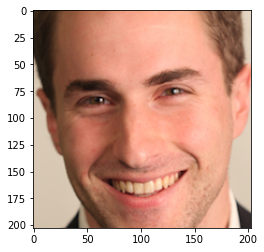

In [19]:
i = 1
for ind in df[df['User_Gender'].isnull()].index:
    img = df['User_img'][ind]
    image_url = str(img)

    gend = get_gender(image_url, i)
    if(gend!=None):
        df['User_Gender'][ind]=gend
        print("chanded to:", df['User_Gender'][ind])
    i = i + 1

print("finished")

In [ ]:
df.User_Gender.isnull().sum()

In [ ]:
df.User_Gender.describe()

In [ ]:
df